In [1]:
#file= '2022090800_AET.nc'
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import matplotlib.pyplot as plt
import os
from mpl_toolkits.basemap import Basemap

In [2]:
ds=nc.Dataset('2022090800_Day.nc')
print(ds.variables.keys())

lat= ds.variables['latitude'][:]
lon= ds.variables['longitude'][:]
ucomp=ds.variables['UGRD_10maboveground'][0]
print(ucomp)
vcomp=ds.variables['VGRD_10maboveground'][0]
print(vcomp)


lon0,lat0=np.meshgrid(lon,lat)
print(lat.shape,lon.shape,ucomp.shape,vcomp.shape)
print('\n Minimum of u component-')
print(ucomp.min())
print('\n max of u component')
print(ucomp.max)
print('\n min of v component')
print(vcomp.min())
print('\n max of v component')
print(vcomp.max())

dict_keys(['latitude', 'longitude', 'time', 'PRES_surface', 'TMP_2maboveground', 'DPT_2maboveground', 'RH_2maboveground', 'UGRD_10maboveground', 'VGRD_10maboveground', 'APCP_surface'])
[[-5.23      -5.22      -5.22      ...  2.72       2.6        2.49     ]
 [-5.29      -5.3399997 -5.31      ...  2.79       2.6799998  2.48     ]
 [-5.2999997 -5.3599997 -5.33      ...  2.83       2.7        2.4299998]
 ...
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]]
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ... -3.99      -4.0099998 -4.0099998]
 [-3.99      -3.97      -3.9399998 ...  0.         0.         0.       ]
 

In [ ]:
plt.barbs(lon,lat,ucomp,vcomp)

In [4]:
ucompm= np.ma.masked_array(ucomp)
vcompm= np.ma.masked_array(vcomp)

In [ ]:
m=Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=40,llcrnrlon=40,urcrnrlon=110,resolution='l')
fig=plt.figure(figsize=(8,8),dpi=250)
m.drawcoastlines()
parallels=np.arange(0,40,10)
m.drawparallels(parallels)
meridians=np.arange(55,110,20)
m.drawmeridians(meridians)

lon2= np.ma.masked_array(lon)
lat2= np.ma.masked_array(lat)

x, y = map(lon2, lat2)

yy = np.arange(0, y.shape[0], 20)
xx = np.arange(0, x.shape[1], 20)
points = np.meshgrid(xx, yy)

map.barbs(x[points], y[points], ucomp[points], vcomp[points],pivot='middle', barbcolor='#333333')


plt.show()



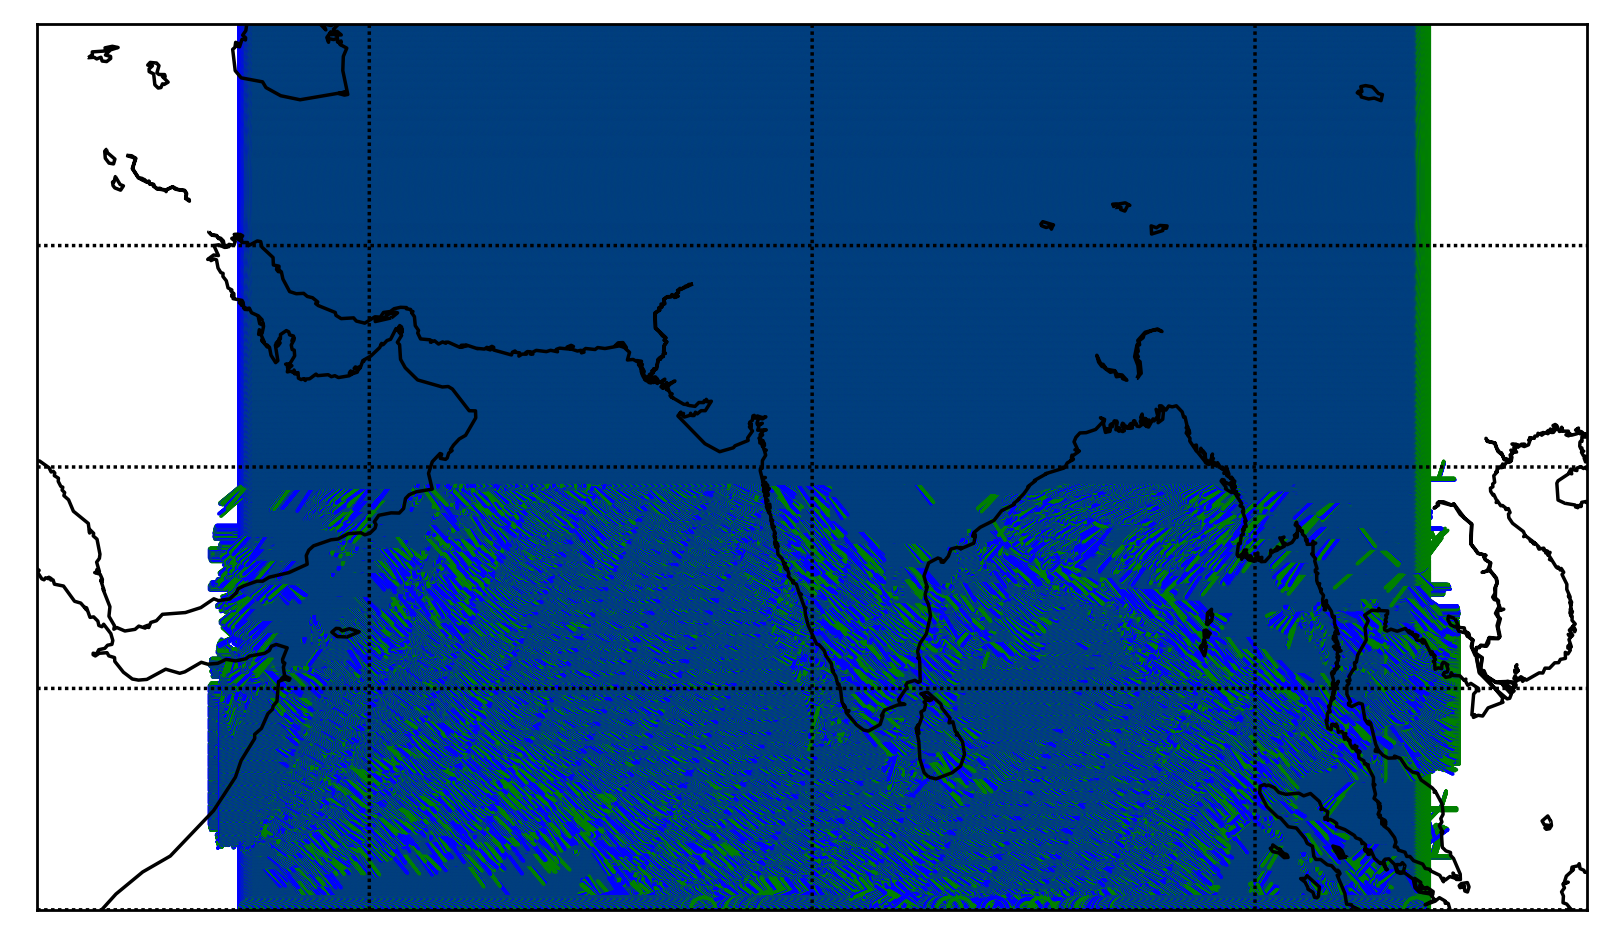

In [10]:
m=Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=40,llcrnrlon=40,urcrnrlon=110,resolution='l')
fig=plt.figure(figsize=(8,8),dpi=250)
m.drawcoastlines()
parallels=np.arange(0,40,10)
m.drawparallels(parallels)
meridians=np.arange(55,110,20)
m.drawmeridians(meridians)
m.barbs(lon0,lat0, ucompm, vcompm, pivot='middle',flagcolor='r',barbcolor=['b', 'g'], flip_barb=True,barb_increments=dict(half=10, full=20, flag=100))
plt.show()


In [ ]:
m=Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=40,llcrnrlon=40,urcrnrlon=110,resolution='l')
fig=plt.figure(figsize=(8,8),dpi=250)
m.drawcoastlines()
clev=np.arange(data.min(),data.max(),1)
parallels=np.arange(0,40,10)
m.drawparallels(parallels)
meridians=np.arange(55,110,20)
m.drawmeridians(meridians)
p=m.contourf(lon0,lat0,data,clev,cmap='jet')
cbar=m.colorbar(p,location='right')
plt.show()

In [ ]:
print(lon)
print(lat)

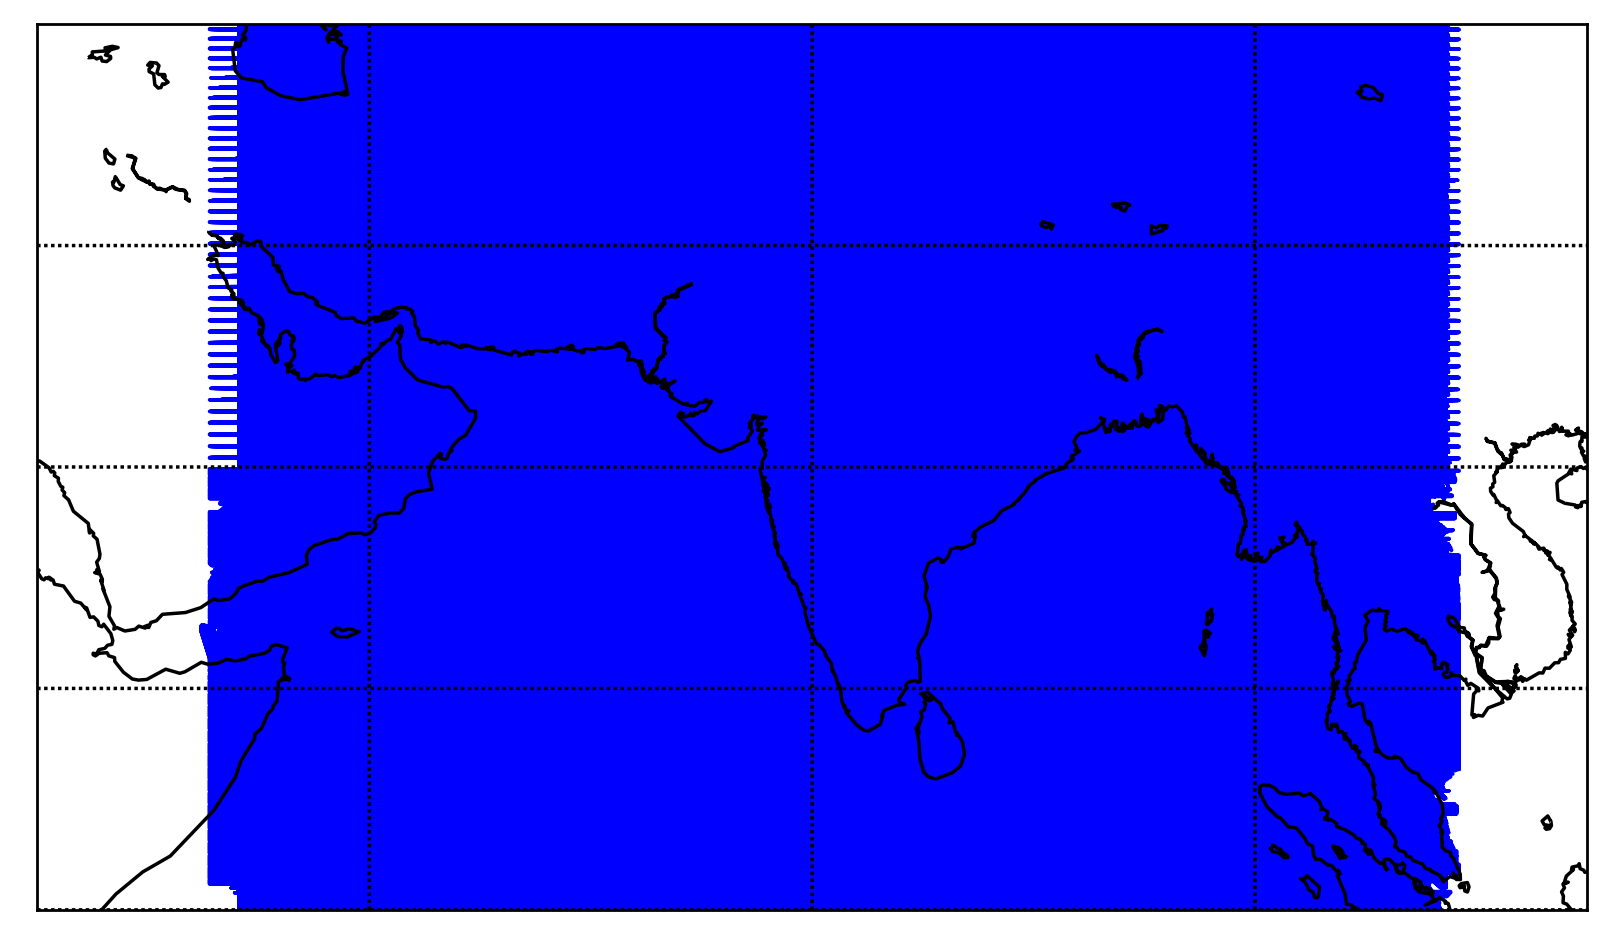

In [9]:
m=Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=40,llcrnrlon=40,urcrnrlon=110,resolution='l')
fig=plt.figure(figsize=(8,8),dpi=250)
m.drawcoastlines()
parallels=np.arange(0,40,10)
m.drawparallels(parallels)
meridians=np.arange(55,110,20)
m.drawmeridians(meridians)
m.barbs(lon0,lat0, ucomp, vcomp, pivot='middle',barbcolor='blue')
plt.show()


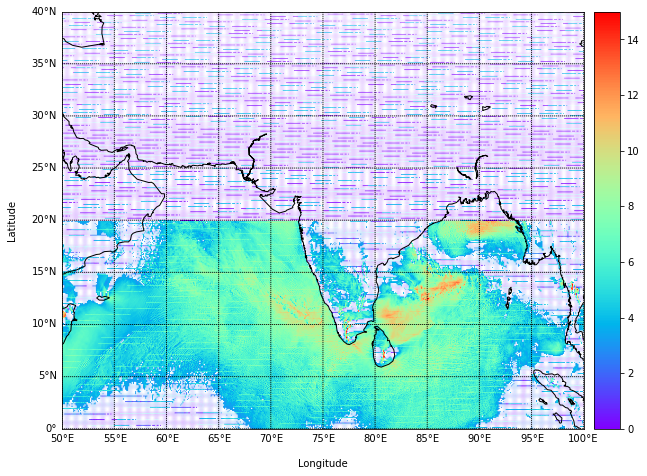

In [82]:
cut = slice(None, None, 4), slice(None, None, 4)          
spd=np.sqrt((ucomp*ucomp)+(vcomp*vcomp))                              # Calculating wind speed
fig, ax = plt.subplots(figsize=(10.0, 10.0))
proj = Basemap(projection='cyl', llcrnrlat=0, llcrnrlon=50, urcrnrlat=40, urcrnrlon=100, resolution='l')
proj.drawcoastlines(color= 'black')
proj.drawparallels(range(-90, 91,5), labels=[True,False,False,False])
proj.drawmeridians(range(-180,181,5), labels=[False,False,False,True])
mm=proj.pcolormesh(lon0,lat0,spd,cmap='rainbow',latlon=True,alpha=1)
mm.set_clim(0,15)
proj.quiver(lon0[cut],lat0[cut],ucomp[cut],vcomp[cut],latlon=True,alpha=None,headlength=2000,scale=1000,width=0.003, facecolor='white')
 

plt.ylabel("Latitude",labelpad=45)
plt.xlabel("Longitude",labelpad=30)
proj.colorbar()

plt.show()
